# Example of K-Means Clustering

<div class="alert alert-info"> 💡 <strong> Introduction: </strong>
<b>
This Notebook provides an example of how to run a K-Means Clustering Algorith using Sickit Learn
</b>
</div>

Clustering is a technique used to partition data into `groups/clusters`. Clusters a groups of data in our dataset which are similar to one another. K-Means is one of the most popular "clustering" algorithms. K-means stores k centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

K-Means finds the best centroids by alternating between 
   1. Assigning data points to clusters based on the current centroids
   2. Chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters

---

## References
   1. [Data from UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
   2. [Dataset: Cancer Genome Atlas Pan-Cancer Analysis](https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz)
   3. [K-Means Clustering in Python: A Practical Guide](https://realpython.com/k-means-clustering-python/#partitional-clustering)
   4. [K-Means Clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)
   5. [Drawbacks of K-Means Clustering](https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means#133656)
   6. [SKlearn K-Means](https://scikit-learn.org/stable/modules/clustering.html#clustering)
   7. [Silhouette Analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

## Contents

1. [Load Packages/Libraries](#Load-Packages)
2. [Set up Path to Files](#Setup-Path)
3. [Add Data and Labels](#Add-Data-and-Labels)
4. [Explore & Visualize the dataset](#Explore-&-Visualize-the-dataset)
    1. [Create Plots](#Create-Plots)
    1. [Get Correlations](#Get-Correlations)
5. [Encode the label using sklearn](#Encode-the-label-using-sklearn)
6. [Determining Number of Clusters](#Determining-Number-of-Clusters)
    1. [Elbow Curve](#Elbow-Curve)
    1. [Silhouette Score](#Silhouette-Score)
    1. [Minmize SSE](#Minmize-SSE)
7. [Standardize data and Reduce Dimensions](#Standardize-data-and-Reduce-Dimensions)  
    1. [Number of PCA components using explained variance](#Number-of-PCA-components-using-explained-variance)
8. [Set up Clustering Pipeline and Fit the data](#Set-up-Clustering-Pipeline-and-Fit-the-data)
9. [Evaluate Performance Metrics](#Evaluate-Performance-Metrics)
    1. [Silhouette Score](#Silhouette-Score)
    1. [Adjusted Rand Score](#Adjusted-Rand-Score)
    1. [Multi label Confusion Matrix](#Multi-label-Confusion-Matrix)
    1. [Visualize the data to see how the clusters are working](#Visualize-the-data-to-see-how-the-clusters-are-working)
10. [Iterate to tune parameters](#Iterate-to-tune-parameters)

### Load Packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Setup Path
Manually download the [datafile](https://archive.ics.uci.edu/ml/machine-learning-databases/00401/). 
<div class="alert alert-info"> 💡 <strong>Python could do it, but Citizens blocks it due to Proxy </strong> </div>
<div class="alert alert-info"> 💡 <strong>Network drive is very slow for big files. C Drive is faster </strong> </div>
 
 
Assign the path of the folder that you are working form  
Extract the tarfile into the folder


In [2]:
import tarfile
# import urllib

in_path = 'C:/Workingfolders/Projects/Clustering_Example/' 
#'U:/d112628-koirala/Projects/KMeansClusters/'
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
file_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"
archive_name = f'{in_path}TCGA-PANCAN-HiSeq-801x20531.tar.gz'

# Extract the data from the archive
tar = tarfile.open(archive_name, "r:gz")
tar.extractall(in_path)
tar.close()

### Add Data and Labels

Data has 801 rows X 20531 Columns  
Labels has 801 values : 1 for each row


In [3]:
# Add data & labels
import numpy as np
datafile = f'{in_path}TCGA-PANCAN-HiSeq-801x20531/data.csv'
labels_file = f'{in_path}/TCGA-PANCAN-HiSeq-801x20531/labels.csv'

data = np.genfromtxt(
    datafile,
    delimiter=",",
    usecols=range(1, 20532),
    skip_header=1
)

true_label_names = np.genfromtxt(
    labels_file,
    delimiter=",",
    usecols=(1,),
    skip_header=1,
    dtype="str"
)


### Explore & Visualize the dataset
#### Alternatively, we could use pandas to load the data and explore it as it makes it easier

In [4]:
print('Data : ' , data.shape, "\n", 'Label :', true_label_names.shape)

Data :  (801, 20531) 
 Label : (801,)


In [5]:
data[:10, :5]

array([[ 0.        ,  2.01720929,  3.26552691,  5.47848651, 10.43199896],
       [ 0.        ,  0.59273209,  1.58842082,  7.58615674,  9.62301086],
       [ 0.        ,  3.51175898,  4.32719872,  6.88178696,  9.87072997],
       [ 0.        ,  3.66361787,  4.50764878,  6.65906827, 10.19618407],
       [ 0.        ,  2.65574107,  2.82154696,  6.53945353,  9.73826456],
       [ 0.        ,  3.46785331,  3.58191761,  6.62024329,  9.70682924],
       [ 0.        ,  1.22496637,  1.6911768 ,  6.57200741,  9.64051067],
       [ 0.        ,  2.85485343,  1.75047788,  7.22672045,  9.75869127],
       [ 0.        ,  3.99212487,  2.77273025,  6.54669231, 10.48825189],
       [ 0.        ,  3.64249364,  4.423558  ,  6.84951144,  9.46446611]])

In [6]:
# Load it using pandas
data1 = pd.read_csv(datafile)
data1['true_label_names'] = true_label_names
data1.head(1)

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20533 entries, Unnamed: 0 to true_label_names
dtypes: float64(20531), object(2)
memory usage: 125.5+ MB


In [9]:
print(true_label_names[:10])
np.unique(true_label_names)

['PRAD' 'LUAD' 'PRAD' 'PRAD' 'BRCA' 'PRAD' 'KIRC' 'PRAD' 'BRCA' 'PRAD']


array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

In [10]:
#See all columns
data1.dtypes[0:20]

Unnamed: 0     object
gene_0        float64
gene_1        float64
gene_2        float64
gene_3        float64
gene_4        float64
gene_5        float64
gene_6        float64
gene_7        float64
gene_8        float64
gene_9        float64
gene_10       float64
gene_11       float64
gene_12       float64
gene_13       float64
gene_14       float64
gene_15       float64
gene_16       float64
gene_17       float64
gene_18       float64
dtype: object

In [12]:
data1.iloc[:,20522:].describe()

,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


#### Create Plots

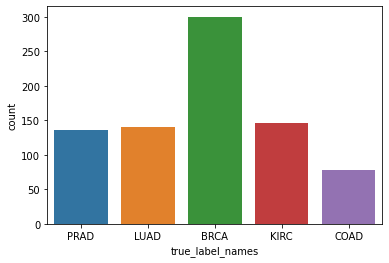

In [13]:
#create a countplot
sns.countplot(data1['true_label_names'])

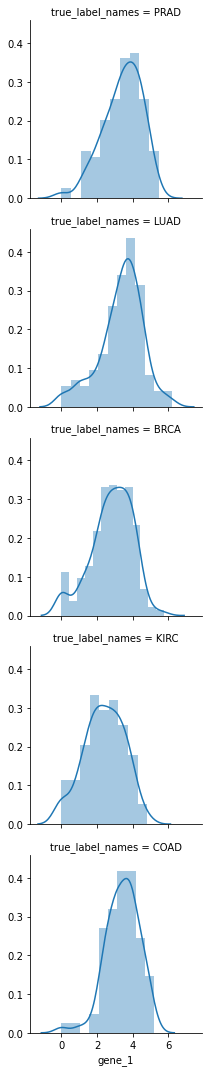

In [14]:
# Explore few other variables
g = sns.FacetGrid(data1,"true_label_names")
g.map(sns.distplot, "gene_1")

#### Get Correlations

In [15]:
data1.iloc[:,20522:].corr()

,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
gene_20521,1.000000,0.628909,0.332271,-0.009810,0.532755,-0.266999,0.433144,0.345210,0.039898,-0.040067
gene_20522,0.628909,1.000000,0.286363,0.115457,0.344739,-0.348636,0.302748,0.413114,0.054090,-0.036635
gene_20523,0.332271,0.286363,1.000000,-0.001992,0.202308,-0.283602,0.448078,0.250467,0.050103,0.001862
gene_20524,-0.009810,0.115457,-0.001992,1.000000,0.193333,-0.217210,-0.127397,0.225442,0.200403,0.027079
gene_20525,0.532755,0.344739,0.202308,0.193333,1.000000,-0.261564,0.197762,0.526923,0.073156,0.030614
gene_20526,-0.266999,-0.348636,-0.283602,-0.217210,-0.261564,1.000000,-0.101292,-0.297921,0.110060,-0.047482
gene_20527,0.433144,0.302748,0.448078,-0.127397,0.197762,-0.101292,1.000000,0.190374,0.087528,-0.068362
gene_20528,0.345210,0.413114,0.250467,0.225442,0.526923,-0.297921,0.190374,1.000000,0.055909,-0.050641
gene_20529,0.039898,0.054090,0.050103,0.200403,0.073156,0.110060,0.087528,0.055909,1.000000,0.017558
gene_20530,-0.040067,-0.036635,0.001862,0.027079,0.030614,-0.047482,-0.068362,-0.050641,0.017558,1.000000


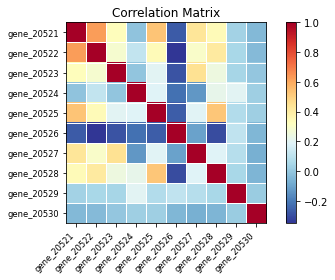

In [16]:
# Correlation Matrix Plot
from statsmodels.graphics.correlation import plot_corr
fig=plot_corr(data1.iloc[:,20522:].corr(),xnames=data1.iloc[:,20522:].corr().columns)

### Encode the label using sklearn

Encoding using sklearn adds the ability to reuse the encoding consistently for new set of data

<div class="alert alert-info"> 💡 <strong> SKLearn has 3 types of objects - Estimators, transformers and predictors </strong>  <br>
    1. Estimators - fit() : calculates the parameter on the training dataset and saves them as internal objects <br>
    2. Transformers - transform() : transforms the dataset using the initial parameters that it got from fit() <br>
    3. Predictors - predict(): uses the fit parameteres to predict<br>
    
fit_transform - fits the data first and then transforms it </div>


In [17]:
# Encode the label using sklearn
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)
true_labels[:5]
label_encoder.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

### Determining Number of Clusters
We need to give KMeans algorithm a guess of how many clusters we think the data has. Few methods that help us are below

#### Elbow Curve



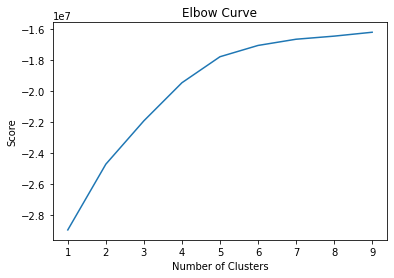

In [18]:
# If we didn't know, we can try the elbow curve to pick the clusters
def elbow_curve(data):
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    Nc = range(1, 10)
    kmeans = [KMeans(n_clusters=i) for i in Nc]
    score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
    plt.plot(Nc,score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Curve')
    plt.show()
    
    
elbow_curve(data)

For this case we know that we have five clusters. But try it with raw data even though it is very big and we will reduce dimensions before using it. It shows that the appropriate number of clusters for us would be about 5

#### Silhouette Score

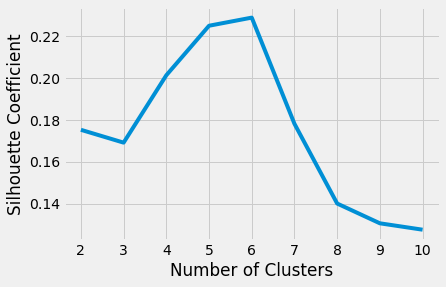

In [21]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,}
    
    
# A list holds the silhouette coefficients for each k
def silhouettescore_clusters(data):
    silhouette_coefficients = []
    
  
    # Notice you start at 2 clusters for silhouette coefficient
    n_start = 2
    n_end = 11   
    for k in range(n_start, n_end):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_coefficients.append(score)

    plt.style.use("fivethirtyeight")
    plt.plot(range(n_start, n_end), silhouette_coefficients)
    plt.xticks(range(n_start, n_end))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Coefficient")
    plt.show()
    

silhouettescore_clusters(data)

#### Minmize SSE

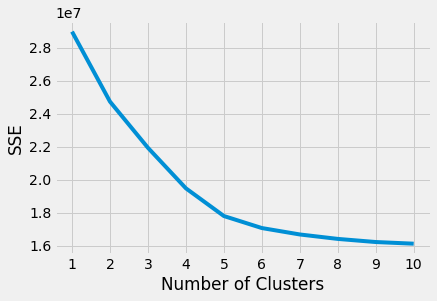

In [22]:
# Can also try to Minimize SSE
def minimize_sse(data):
    sse = []
    n_start = 1
    n_end = 11
    for k in range(n_start, n_end):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)

    plt.style.use("fivethirtyeight")
    plt.plot(range(n_start, n_end), sse)
    plt.xticks(range(n_start, n_end))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()
    
minimize_sse(data)

### Standardize data and Reduce Dimensions

If your variables are of incomparable units then you should standardize variables. Even if variables are of the same units but show quite different variances it is still a good idea to standardize before K-means. K-means clustering is "isotropic" in all directions of space and therefore tends to produce more or less round (rather than elongated) clusters. In this situation leaving variances unequal is equivalent to putting more weight on variables with smaller variance, so clusters will tend to be separated along variables with greater variance.

The dataset has ~21K columns, it is also a better idea to reduce dimensions. Utilize dimension reduction techniques like PCA, Factor Analysis, etc. to reduce them.

We use PCA with 2 dimensions to make it easy to understand this example. We can refine the components later  

We can also create Pipelines in sklearn which basically creates a process flow. For the case below, it basically says perform a MinMaxScaler standardization and then run PCA on the data

In [23]:
# Set up pipeline to standardize and do a PCA analysis
n_comp = 2
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=n_comp, random_state=42)),
    ]
)


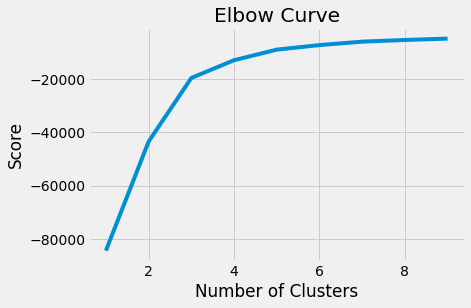

In [24]:
#Run an Elbow Curve to this transformed data
elbow_curve(preprocessor.fit_transform(data))

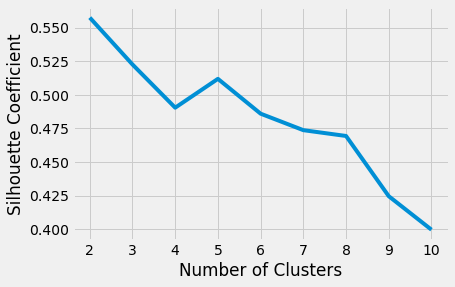

In [25]:
#Run an Silhouette Score to this transformed data
silhouettescore_clusters(preprocessor.fit_transform(data))

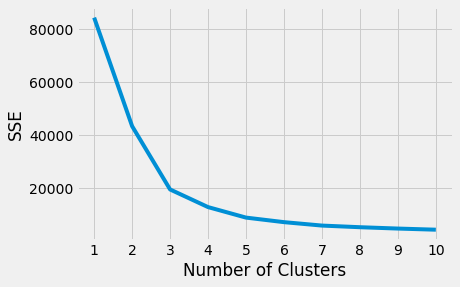

In [26]:
#Minimize SSE on this transformed data
minimize_sse(preprocessor.fit_transform(data))

#### Number of PCA components using explained variance
Run the code below which will tune the ideal number of PCA components based on explained variance

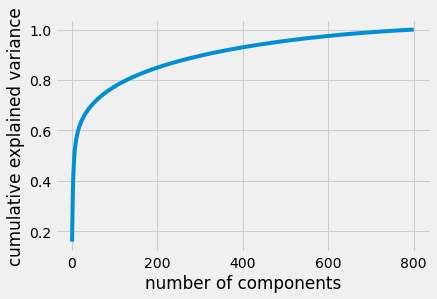

In [27]:
pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [28]:
np.cumsum(pca.explained_variance_ratio_)

array([0.1583855 , 0.2634251 , 0.35814731, 0.42315534, 0.45931152,
       0.48903819, 0.51560962, 0.53123692, 0.54530766, 0.55757639,
       0.56717749, 0.57607968, 0.58366174, 0.59089195, 0.59753197,
       0.60390911, 0.60960395, 0.61477972, 0.61940094, 0.62385606,
       0.62829064, 0.63235498, 0.63630967, 0.64004161, 0.64372717,
       0.64728399, 0.65076886, 0.65393608, 0.65703989, 0.65999226,
       0.66288443, 0.66564737, 0.66837843, 0.67099892, 0.67351297,
       0.67602413, 0.6784305 , 0.68078729, 0.68310899, 0.6853634 ,
       0.68758355, 0.68975842, 0.69187982, 0.69398327, 0.69606924,
       0.69811214, 0.70007687, 0.70203415, 0.70396834, 0.70585967,
       0.70767739, 0.7094626 , 0.71122029, 0.71294727, 0.71465138,
       0.71633096, 0.71797348, 0.71960224, 0.72121483, 0.72279483,
       0.72436624, 0.72592109, 0.72746361, 0.72897631, 0.73045931,
       0.73193591, 0.73339278, 0.73482327, 0.73622256, 0.73760844,
       0.73898207, 0.7403496 , 0.7416901 , 0.74302339, 0.74434

### Set up Clustering Pipeline and Fit the data

In [29]:
# k-means clustering
n_clusters = 5
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

# Preprocess and then run a k-means clustering
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

# Fit Data
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

### Evaluate Performance Metrics

#### Silhouette Score  
Average distance to elements in the same cluster with average distance to elements in other clusters  
Higher the value, the model is well clustered

#### Adjusted Rand Score  
Since we have true labels for the data, we can calculate rand index - computes how similar the clusters are to benchmark classifications. Higher the score, better the the clusters

In [30]:
preprocessed_data = pipe["preprocessor"].transform(data)
predicted_labels = pipe["clusterer"]["kmeans"].labels_

# Silhouette Score
print('Silhouette Score = ', silhouette_score(preprocessed_data, predicted_labels))

#Rand Score
print('Adjsuted Rand Score = ', adjusted_rand_score(true_labels, predicted_labels))

Silhouette Score =  0.5118775528450307
Adjsuted Rand Score =  0.722276752060253


#### Multi label Confusion Matrix
We can also check the multi label conufsion matrix for the clusters

In [31]:
from sklearn.metrics import multilabel_confusion_matrix
true_lab = label_encoder.inverse_transform(true_labels)
pred_lab = label_encoder.inverse_transform(predicted_labels)
labels = label_encoder.classes_
ml_cm = multilabel_confusion_matrix(true_lab, pred_lab, labels = labels)
print('Multi Confusion Matrix :\n', ml_cm)

Multi Confusion Matrix :
 [[[493   8]
  [ 60 240]]

 [[584 139]
  [ 78   0]]

 [[512 143]
  [146   0]]

 [[572  88]
  [129  12]]

 [[494 171]
  [136   0]]]


In [32]:
# Confusion matrix
def cmat_metrics(matrix_2by2):
    tp, fp, fn, tn = matrix_2by2[0,0], matrix_2by2[0,1], matrix_2by2[1,0], matrix_2by2[1,1]
    accuracy = (tp+tn)/(tp+fp+fn+tn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn) #true positive rate
    specificity = tn/(tn+fp) # false positive rate = 1 - specificity
    f1score = 2*tp/(2*tp+fp+fn)

    print('\n','Accuracy :','{:.2f}'.format(accuracy), "\n",
      'Precision :','{:.2f}'.format(precision), "\n",
      'Recall/Sensitivity/True Positive Rate :', '{:.2f}'.format(recall), "\n",
      'Specificity / 1 - False Positive Rate :', '{:.2f}'.format(specificity), "\n",
      'F1 Score :', '{:.2f}'.format(f1score))


for x in range(len(ml_cm)):
    print(labels[[x]])
    print(ml_cm[x])
    cmat_metrics(ml_cm[x])
    print("\n")

['BRCA']
[[493   8]
 [ 60 240]]

 Accuracy : 0.92 
 Precision : 0.98 
 Recall/Sensitivity/True Positive Rate : 0.89 
 Specificity / 1 - False Positive Rate : 0.97 
 F1 Score : 0.94


['COAD']
[[584 139]
 [ 78   0]]

 Accuracy : 0.73 
 Precision : 0.81 
 Recall/Sensitivity/True Positive Rate : 0.88 
 Specificity / 1 - False Positive Rate : 0.00 
 F1 Score : 0.84


['KIRC']
[[512 143]
 [146   0]]

 Accuracy : 0.64 
 Precision : 0.78 
 Recall/Sensitivity/True Positive Rate : 0.78 
 Specificity / 1 - False Positive Rate : 0.00 
 F1 Score : 0.78


['LUAD']
[[572  88]
 [129  12]]

 Accuracy : 0.73 
 Precision : 0.87 
 Recall/Sensitivity/True Positive Rate : 0.82 
 Specificity / 1 - False Positive Rate : 0.12 
 F1 Score : 0.84


['PRAD']
[[494 171]
 [136   0]]

 Accuracy : 0.62 
 Precision : 0.74 
 Recall/Sensitivity/True Positive Rate : 0.78 
 Specificity / 1 - False Positive Rate : 0.00 
 F1 Score : 0.76




#### Visualize the data to see how the clusters are working

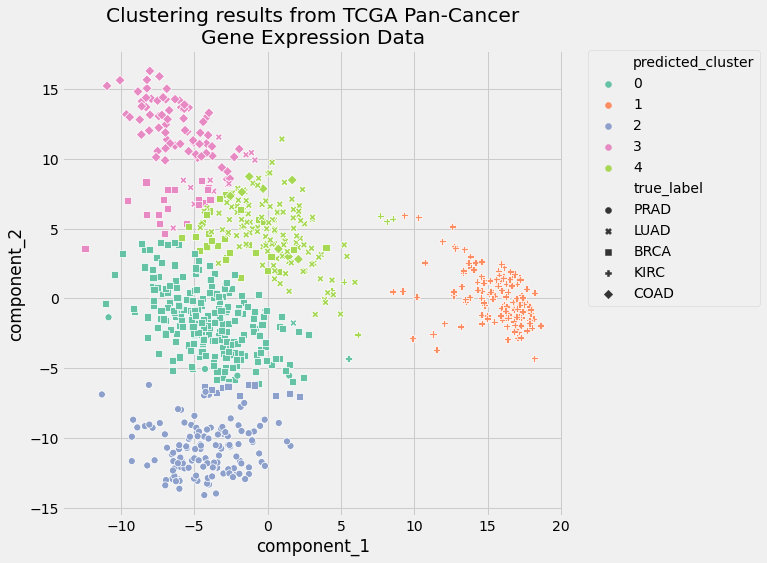

In [33]:
# Since we only have 2 dimensions here, easy to visualize
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA Pan-Cancer\nGene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()


### Iterate to tune parameters

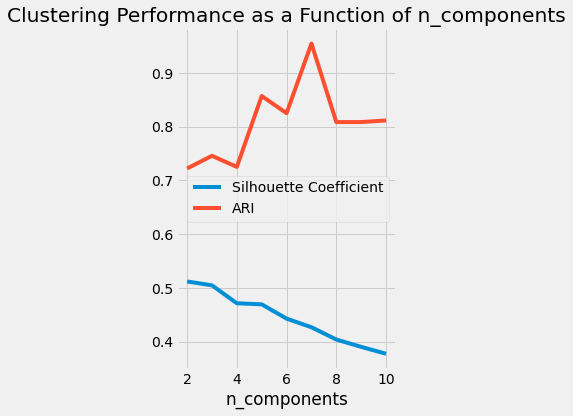

In [34]:
# See how the model performs for different cluster levels
silhouette_scores = []
ari_scores = []
for n in range(2, 11):
    # This set the number of components for pca,
    # but leaves other steps unchanged
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(data)

    silhouette_coef = silhouette_score(
        pipe["preprocessor"].transform(data),
        pipe["clusterer"]["kmeans"].labels_,
    )
    ari = adjusted_rand_score(
        true_labels,
        pipe["clusterer"]["kmeans"].labels_,
    )

    # Add metrics to their lists
    silhouette_scores.append(silhouette_coef)
    ari_scores.append(ari)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    silhouette_scores,
    c="#008fd5",
    label="Silhouette Coefficient",
)
plt.plot(range(2, 11), ari_scores, c="#fc4f30", label="ARI")

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()